# Atividade 2 de CT-236 2020 

## Instalação

pip install --user igraph

pip install --user networkx

pip install --user numpy

## Imports

In [79]:
import random

import numpy as np
import igraph as ig
import networkx as nx

import matplotlib.pyplot as plt

## Funções Auxiliares

In [80]:
def ba_builder(n):
    g = ig.Graph(3, directed=False)  # Começa com 3 nós
    g.add_edges([(0,1),(1,2),(2,0)]) # conectados em triângulo
    for _ in range(n-3):
        degrees = np.array(g.degree())
        degrees = degrees / degrees.sum()
        
        results = np.random.random(size=(degrees.shape)) \
                    < degrees

        vertex = g.add_vertex()
        for i in range(len(results)):
            if results[i]:
                g.add_edge(vertex.index, i)
    return g

def ws_builder(n, mu):
    m = 1
    size = n
    r = 2
    return ig.Graph.Watts_Strogatz(m, n, r, mu)

def hk_builder(n, p):
    g = nx.powerlaw_cluster_graph(n,2,p)
    return g

def generator(i, n, name, mu=0.5, p=0.5):
    idx = 0
    for _ in range(i):
        if name == "ba":
            g = ba_builder(n)
        elif name == "ws":
            g = ws_builder(n, mu)
        elif name == "hk":
            g = hk_builder(n, p)
        yield g, idx
        idx += 1

## Exemplos de redes geradas

In [81]:
for n in range(10, 110, 10):
    file_name = './images/examples/ws_n{}.png'.format(n)
    g = ws_builder(n, 0.1)
    layout = g.layout("kk")
    ig.plot(g, target=file_name, layout=layout)

N = 5000, mean +- sd: 4.0000 +- 0.8755
Each * represents 43 items
[ 0,  1):  (1)
[ 1,  2):  (14)
[ 2,  3): **** (173)
[ 3,  4): *********************** (1019)
[ 4,  5): ************************************************************* (2626)
[ 5,  6): ********************** (957)
[ 6,  7): **** (181)
[ 7,  8):  (25)
[ 8,  9):  (3)
[ 9, 10):  (1)


(array([1.400e+01, 1.730e+02, 1.019e+03, 2.626e+03, 9.570e+02, 1.810e+02,
        2.500e+01, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 <a list of 18 Patch objects>)

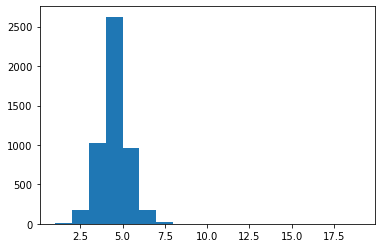

In [82]:
ws = ws_builder(5000,0.1)
print(ws.degree_distribution())
plt.hist(ws.degree(), bins=range(1,20,1))

In [83]:
for n in range(10, 110, 10):
    file_name = './images/examples/ba_n{}.png'.format(n)
    g = ba_builder(n)
    layout = g.layout("kk")
    ig.plot(g, target=file_name, layout=layout)

N = 5000, mean +- sd: 1.9680 +- 4.5585
Each * represents 31 items
[  0,   1): *********************************************************** (1854)
[  1,   2): *************************************** (1216)
[  2,   3): ************************* (783)
[  3,   4): ************ (397)
[  4,   5): ******** (250)
[  5,   6): **** (147)
[  6,   7): *** (99)
[  7,   8): * (51)
[  8,   9): * (38)
[  9,  10):  (28)
[ 10,  11):  (23)
[ 11,  12):  (13)
[ 12,  13):  (20)
[ 13,  14):  (18)
[ 14,  15):  (6)
[ 15,  16):  (3)
[ 16,  17):  (11)
[ 17,  18):  (1)
[ 18,  19):  (4)
[ 19,  20):  (4)
[ 20,  21):  (7)
[ 21,  22):  (2)
[ 22,  23):  (0)
[ 23,  24):  (1)
[ 24,  25):  (1)
[ 25,  26):  (2)
[ 26,  27):  (2)
[ 27,  28):  (1)
[ 28,  29):  (0)
[ 29,  30):  (3)
[ 30,  31):  (2)
[ 31,  32):  (0)
[ 32,  33):  (0)
[ 33,  34):  (0)
[ 34,  35):  (2)
[ 35,  36):  (1)
[ 36,  37):  (1)
[ 37,  38):  (0)
[ 38,  39):  (0)
[ 39,  40):  (0)
[ 40,  41):  (0)
[ 41,  42):  (0)
[ 42,  43):  (1)
[ 43,  44):  (1)
[ 44,  45):

(array([1.216e+03, 7.830e+02, 3.970e+02, 2.500e+02, 1.470e+02, 9.900e+01,
        5.100e+01, 3.800e+01, 2.800e+01, 2.300e+01, 1.300e+01, 2.000e+01,
        1.800e+01, 6.000e+00, 3.000e+00, 1.100e+01, 1.000e+00, 8.000e+00]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 <a list of 18 Patch objects>)

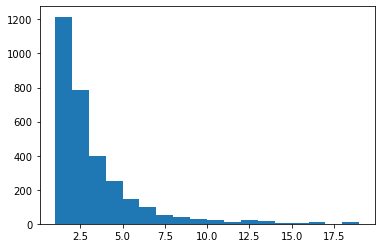

In [84]:
ba = ba_builder(5000)
print(ba.degree_distribution())
plt.hist(ba.degree(), bins=range(1,20,1))

In [85]:
for n in range(10, 110, 10):
    file_name = './images/examples/hk_n{}.png'.format(n)
    g = hk_builder(n, 0.01)
    nx.draw_kamada_kawai(g)
    plt.savefig(file_name)
    plt.close()

(array([   0., 2544.,  986.,  485.,  276.,  165.,  120.,   96.,   66.,
          40.,   35.,   19.,   20.,   15.,   11.,   10.,   13.,   18.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 <a list of 18 Patch objects>)

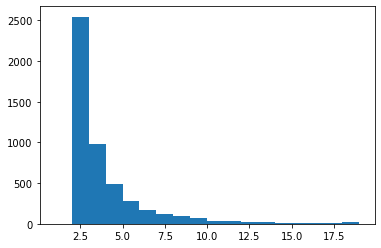

In [86]:
hk = hk_builder(5000, 0.01)
degrees = [hk.degree(n) for n in hk.nodes()]
plt.hist(degrees, bins=range(1,20,1))

## Primeiro Experimento

In [87]:
NUM_SAMPLES = 10

# 2^5 -> 2^10; take 100 values
ns = np.logspace(5, 10, num=100, base=2)

ba_ccs = []
ba_apls = []
ba_diams = []

for n in ns:
    n = int(n)

    acc_ccs = np.zeros(NUM_SAMPLES)
    acc_apls = np.zeros(NUM_SAMPLES)
    acc_diams = np.zeros(NUM_SAMPLES)
    for g, i in generator(NUM_SAMPLES, n, "ba"):
        acc_ccs[i] = g.transitivity_undirected()
        acc_apls[i] = g.average_path_length()
        acc_diams[i] = g.diameter()

    ba_ccs.append(np.mean(acc_ccs))
    ba_apls.append(np.mean(acc_apls))
    ba_diams.append(np.mean(acc_diams))

### Plot: CC

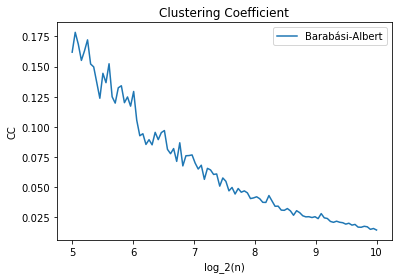

In [88]:
plt.plot(np.log2(ns), ba_ccs)
plt.xlabel('log_2(n)')
plt.ylabel('CC')
plt.title('Clustering Coefficient')
plt.legend(['Barabási-Albert'])
plt.savefig('./images/results/ba_cc.png')

### Plot: CC (log-log)

Coefficients: [  -0.708395458473164  ,  1.072479650383288  ]


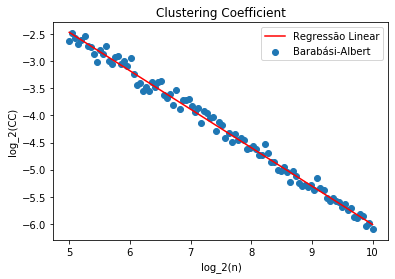

In [89]:
from numpy.polynomial import Polynomial
p = Polynomial.fit(np.log2(ns), np.log2(ba_ccs), 1)
coef = p.convert().coef
print("Coefficients: [ ", coef[1], " , ", coef[0], " ]")

plt.scatter(np.log2(ns), np.log2(ba_ccs))
plt.plot(*p.linspace(), color='red')

plt.xlabel('log_2(n)')
plt.ylabel('log_2(CC)')
plt.title('Clustering Coefficient')
plt.legend(["Regressão Linear", "Barabási-Albert"])
plt.savefig('./images/results/ba_logcc.png')

### Plot: APL

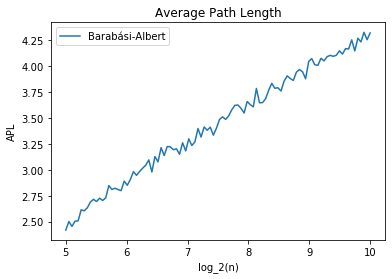

In [90]:
plt.plot(np.log2(ns), ba_apls)
plt.xlabel('log_2(n)')
plt.ylabel('APL')
plt.title('Average Path Length')
plt.legend(["Barabási-Albert"])
plt.savefig('./images/results/ba_apl.png')

### Plot: Diâmetro

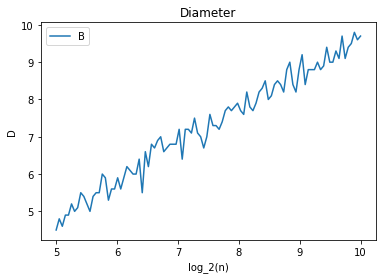

In [91]:
plt.plot(np.log2(ns), ba_diams)
plt.xlabel('log_2(n)')
plt.ylabel('D')
plt.title('Diameter')
plt.legend("BA")
plt.savefig('./images/results/ba_diam.png')

## Segudo Experimento

### Função auxiliar: reaproveitar resultados de BA (usa igraph)

In [92]:
NUM_SAMPLES = 10

def experiment(mu):
    NUM_SAMPLES = 10

    # 2^5 -> 2^12; take 100 values
    ns = np.logspace(5, 10, num=100, base=2)

    ws_ccs = []
    ws_apls = []
    ws_diams = []

    for n in ns:
        n = int(n)

        acc_ccs = np.zeros(NUM_SAMPLES)
        acc_apls = np.zeros(NUM_SAMPLES)
        acc_diams = np.zeros(NUM_SAMPLES)
        for g, i in generator(NUM_SAMPLES, n, "ws", mu=mu):
            acc_ccs[i] = g.transitivity_undirected()
            acc_apls[i] = g.average_path_length()
            acc_diams[i] = g.diameter()

        ws_ccs.append(np.mean(acc_ccs))
        ws_apls.append(np.mean(acc_apls))
        ws_diams.append(np.mean(acc_diams))

    return ws_ccs, ws_apls, ws_diams

### Executando experimento

In [93]:
ws_2_ccs, ws_2_apls, ws_2_diams = experiment(0.20)
ws_5_ccs, ws_5_apls, ws_5_diams = experiment(0.50)
ws_7_ccs, ws_7_apls, ws_7_diams = experiment(0.70)

### Plot: CC (BA vs WS)

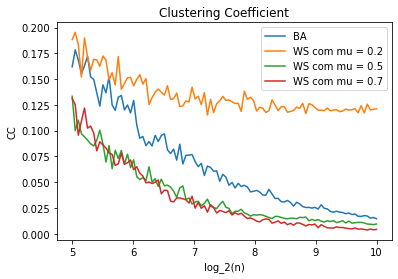

In [94]:
plt.plot(np.log2(ns), ba_ccs)
plt.plot(np.log2(ns), ws_2_ccs)
plt.plot(np.log2(ns), ws_5_ccs)
plt.plot(np.log2(ns), ws_7_ccs)
plt.xlabel('log_2(n)')
plt.ylabel('CC')
plt.title('Clustering Coefficient')
plt.legend(['BA', 'WS com mu = 0.2', 'WS com mu = 0.5', 'WS com mu = 0.7'])
plt.savefig('./images/results/comp_cc.png')

### Plot: APL (BA vs WS)

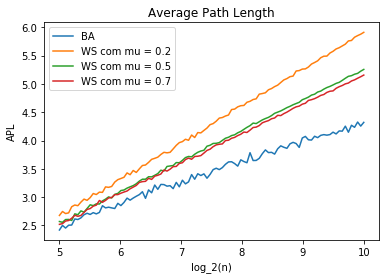

In [95]:
plt.plot(np.log2(ns), ba_apls)
plt.plot(np.log2(ns), ws_2_apls)
plt.plot(np.log2(ns), ws_5_apls)
plt.plot(np.log2(ns), ws_7_apls)
plt.xlabel('log_2(n)')
plt.ylabel('APL')
plt.title('Average Path Length')
plt.legend(['BA', 'WS com mu = 0.2', 'WS com mu = 0.5', 'WS com mu = 0.7'])
plt.savefig('./images/results/comp_apl.png')

## Terceiro Experimento

### Função auxiliar: reaproveitar resultados de BA (usa networkx)

In [96]:
NUM_SAMPLES = 10

def experiment(p):
    NUM_SAMPLES = 10

    # 2^5 -> 2^12; take 100 values
    ns = np.logspace(5, 10, num=100, base=2)

    hk_ccs = []
    hk_apls = []
    hk_diams = []

    for n in ns:
        n = int(n)

        acc_ccs = np.zeros(NUM_SAMPLES)
        acc_apls = np.zeros(NUM_SAMPLES)
        acc_diams = np.zeros(NUM_SAMPLES)
        for g, i in generator(NUM_SAMPLES, n, "hk", p=p):
            acc_ccs[i] = nx.transitivity(g)
            acc_apls[i] = nx.average_shortest_path_length(g)
            acc_diams[i] = nx.diameter(g)

        hk_ccs.append(np.mean(acc_ccs))
        hk_apls.append(np.mean(acc_apls))
        hk_diams.append(np.mean(acc_diams))

    return hk_ccs, hk_apls, hk_diams

### Executando experimento

In [97]:
hk_2_ccs, hk_2_apls, hk_2_diams = experiment(0.20)
hk_5_ccs, hk_5_apls, hk_5_diams = experiment(0.50)
hk_7_ccs, hk_7_apls, hk_7_diams = experiment(0.70)

### Plot: CC (BA vs HK)

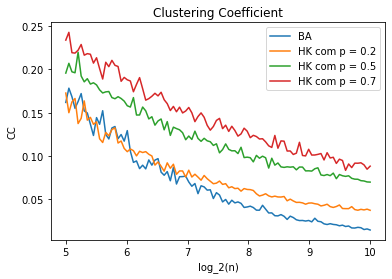

In [98]:
plt.plot(np.log2(ns), ba_ccs)
plt.plot(np.log2(ns), hk_2_ccs)
plt.plot(np.log2(ns), hk_5_ccs)
plt.plot(np.log2(ns), hk_7_ccs)
plt.xlabel('log_2(n)')
plt.ylabel('CC')
plt.title('Clustering Coefficient')
plt.legend(['BA', 'HK com p = 0.2', 'HK com p = 0.5', 'HK com p = 0.7'])
plt.savefig('./images/results/hk_cc.png')

### Plot: APL (BA vs HK)

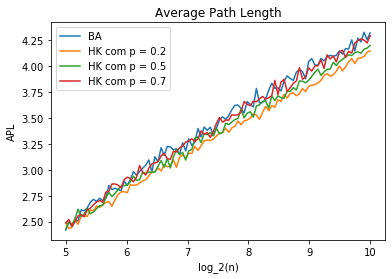

In [99]:
plt.plot(np.log2(ns), ba_apls)
plt.plot(np.log2(ns), hk_2_apls)
plt.plot(np.log2(ns), hk_5_apls)
plt.plot(np.log2(ns), hk_7_apls)
plt.xlabel('log_2(n)')
plt.ylabel('APL')
plt.title('Average Path Length')
plt.legend(['BA', 'HK com p = 0.2', 'HK com p = 0.5', 'HK com p = 0.7'])
plt.savefig('./images/results/hk_apl.png')